### Real time credit card fraud detection using Isolation Forest

In [2]:
## importing libraries and modules
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os

In [3]:
#file path
file_path = r"C:\Users\anish\Downloads\creditcard.csv"

# check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"CSV file is not found at the given path: {file_path}")

#load csv as a dataframe
df = pd.read_csv(file_path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


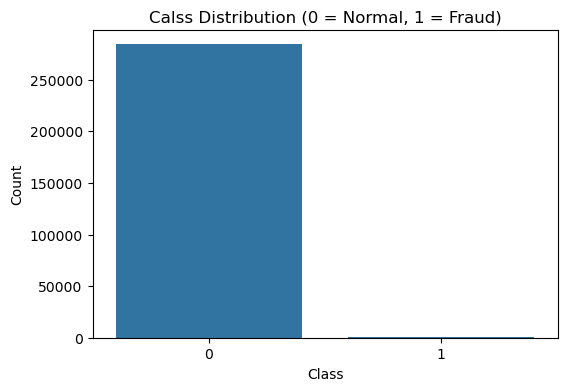

Text(0, 0.5, 'Density')

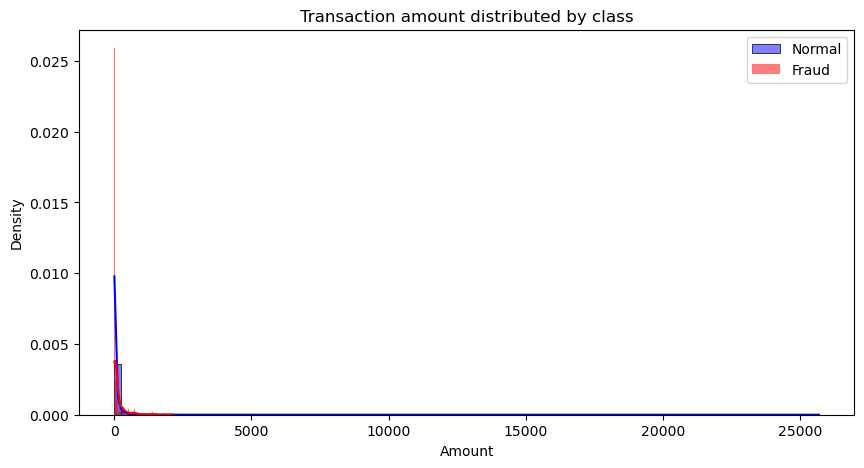

In [ ]:
#Data Analysis
#1. Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#2. Transaction amount distribution by class
plt.figure(figsize=(10,5))
sns.histplot(data = df[df["Class"]==0], x = "Amount", bins=100, color="blue", label="Normal", stat = "density", kde=True)
sns.histplot(data = df[df["Class"]==1], x = "Amount", bins=100, color="red", label="Fraud", stat = "density", kde=True)
plt.legend()
plt.title("Transaction amount distributed by class")
plt.xlabel("Amount")
plt.ylabel("Density")

In [ ]:
#Model Training and Testing
X = df.drop("Class", axis=1) #droping the Class column
y = df["Class"]

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest
model = IsolationForest(contamination=0.002, random_state=11)
model.fit(X_scaled)

# Predict anomalies (-1 means anomaly, 1 means normal)
y_pred = model.predict(X_scaled)

#Convert to 0=normal and 1=fraud
y_pred=[1 if x==-1 else 0 for x in y_pred]

#Evaluation
print("Confusion matrix:\n",confusion_matrix(y, y_pred))
print("classification report:\n",classification_report(y, y_pred))


Confusion matrix:

[[283885    430]
 [   352    140]]
classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.25      0.28      0.26       492

    accuracy                           1.00    284807
   macro avg       0.62      0.64      0.63    284807
weighted avg       1.00      1.00      1.00    284807

